# Importing Dataset and Creating DataFrame

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler as sc
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
import plotly
import scipy
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
df = pd.read_csv('/Users/chisomokezie/Downloads/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Hypothesis for testing

Null Hypothesis (H0): The level of citric acidity and volatility acidity in wine does not significantly affect the quality score. In other words, there is no relationship between these acidity levels and wine quality.

Alternative Hypothesis (H1): The level of citric acidity and volatility acidity in wine significantly affects the quality score. Specifically, you believe that higher rates of citric acidity and lower rates of volatility acidity are associated with higher-quality wine.

Assuming the null hypothesis is true, let's find enough evidence to reject the null hypothesis.

<Axes: >

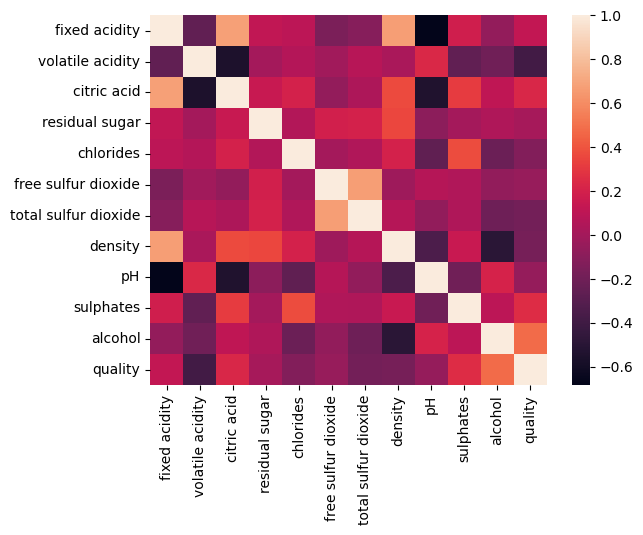

In [6]:
sns.heatmap(data = df.corr())

\begin{equation}
\begin{cases}
H_0: \mu_{\text{citric}} = \mu_{\text{volatility}} \\
H_a: \mu_{\text{citric}} \neq \mu_{\text{volatility}}
\end{cases}
\end{equation}

$Let\quad\alpha = 5\%$
$n=1599\\
$

# EDA

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   fixed acidity                1599 non-null   float64 
 1   volatile acidity             1599 non-null   float64 
 2   citric acid                  1599 non-null   float64 
 3   residual sugar               1599 non-null   float64 
 4   chlorides                    1599 non-null   float64 
 5   free sulfur dioxide          1599 non-null   float64 
 6   total sulfur dioxide         1599 non-null   float64 
 7   density                      1599 non-null   float64 
 8   pH                           1599 non-null   float64 
 9   sulphates                    1599 non-null   float64 
 10  alcohol                      1599 non-null   float64 
 11  quality                      1599 non-null   int64   
 12  volatile_acidity_groups      1599 non-null   category
 13  cit

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

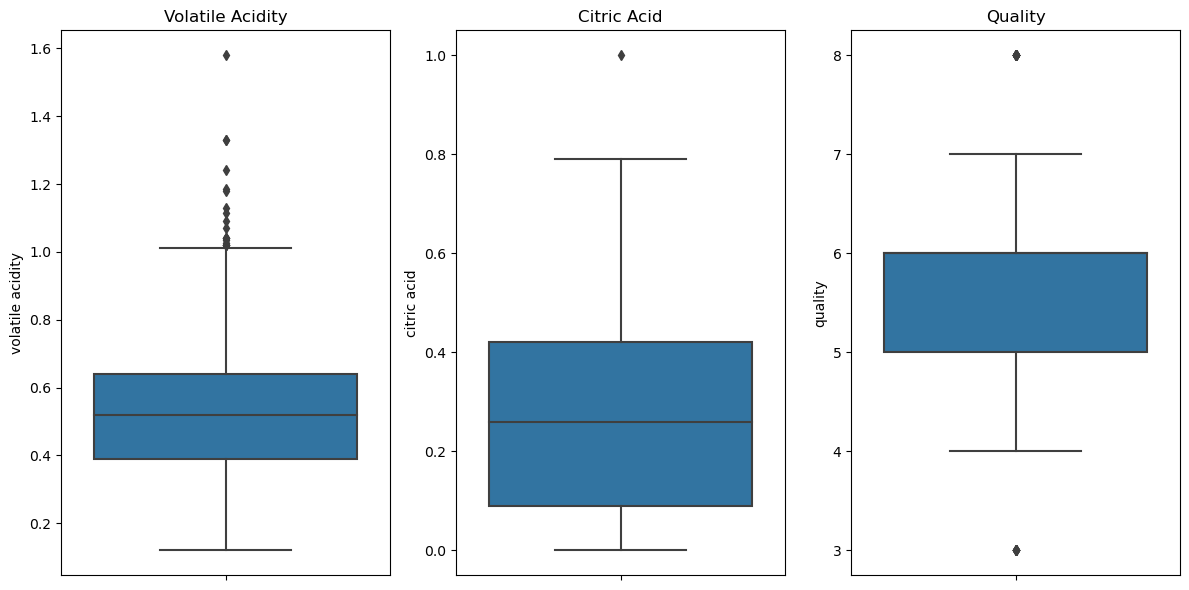

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot for 'volatile acidity,' and 'citric acid,'
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a subplot for 'volatile acidity'
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='volatile acidity')
plt.title('Volatile Acidity')

# Create a subplot for 'citric acid'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='citric acid')
plt.title('Citric Acid')

# Adjust spacing between subplots
plt.tight_layout()

# Show the box plots
plt.show()

# Hypothesis Testing - using an ANOVA

In [12]:
#set significance level as 0.05
alpha = 0.05

In [13]:
#sample mean and standard deviation
ci_mean = df['citric acid'].mean
vo_mean = df['volatile acidity'].mean
q_mean = df['quality'].mean

ci_std = df['citric acid'].std(ddof=1)
vo_std = df['volatile acidity'].std(ddof=1)
q_std = df['quality'].std(ddof=1)

##perform two-sample t-test
from scipy.stats import ttest_ind
#convert the df to nd.array
ca = df['citric acid'].values
va = df['volatile acidity'].values

t_statistic, p_value = ttest_ind(ca,va)
print(p_value)

if p_value < alpha:
    print("reject the null, significant difference")
else:
    print("Fail to reject the null, no significant difference")

2.2126548262075144e-270
reject the null, significant difference


In [14]:
# Perform ANOVA tests
f_stat_citric, p_value_citric = stats.f_oneway(ca, df['quality'])
f_stat_volatile, p_value_volatile = stats.f_oneway(va, df['quality'])

print("ANOVA for 'citric acidity':")
print(f"F-statistic: {f_stat_citric}")
print(f"P-value: {p_value_citric}")

print("\nANOVA for 'volatile acidity':")
print(f"F-statistic: {f_stat_volatile}")
print(f"P-value: {p_value_volatile}")

ANOVA for 'citric acidity':
F-statistic: 66691.9609499734
P-value: 0.0

ANOVA for 'volatile acidity':
F-statistic: 60979.236731872996
P-value: 0.0


# KMeans Testing - 
1. Testing for Gaussian distribution
2. Scaling the distribution
3. Cluster testing
4. PCA
5. KMEANS

# Distribution Testing

In [16]:
#Using shapiro p-valuefor volatile acidity
from scipy.stats import shapiro

test = df['volatile acidity']

stat, p = shapiro(test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print("normal distribution")
    
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268638537394731
Not a normal distribution


In [17]:
#Using shapiro p-value for citric acidity
from scipy.stats import shapiro

test = df['citric acid']

stat, p = shapiro(test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print("normal distribution")
    
else:
    print('Not a normal distribution')

stat=0.96, p=0.000000000000000000001023394478
Not a normal distribution


In [18]:
#using D’Agostino’s K^2 Test for volatile acidity
from scipy.stats import  normaltest
test = df['volatile acidity']
stat, p = normaltest(test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=143.419, p=0.000
Probably not Gaussian


In [19]:
#using  D’Agostino’s K^2 Test for citric acid
from scipy.stats import  normaltest
test = df['citric acid']
stat, p = normaltest(test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=152.039, p=0.000
Probably not Gaussian


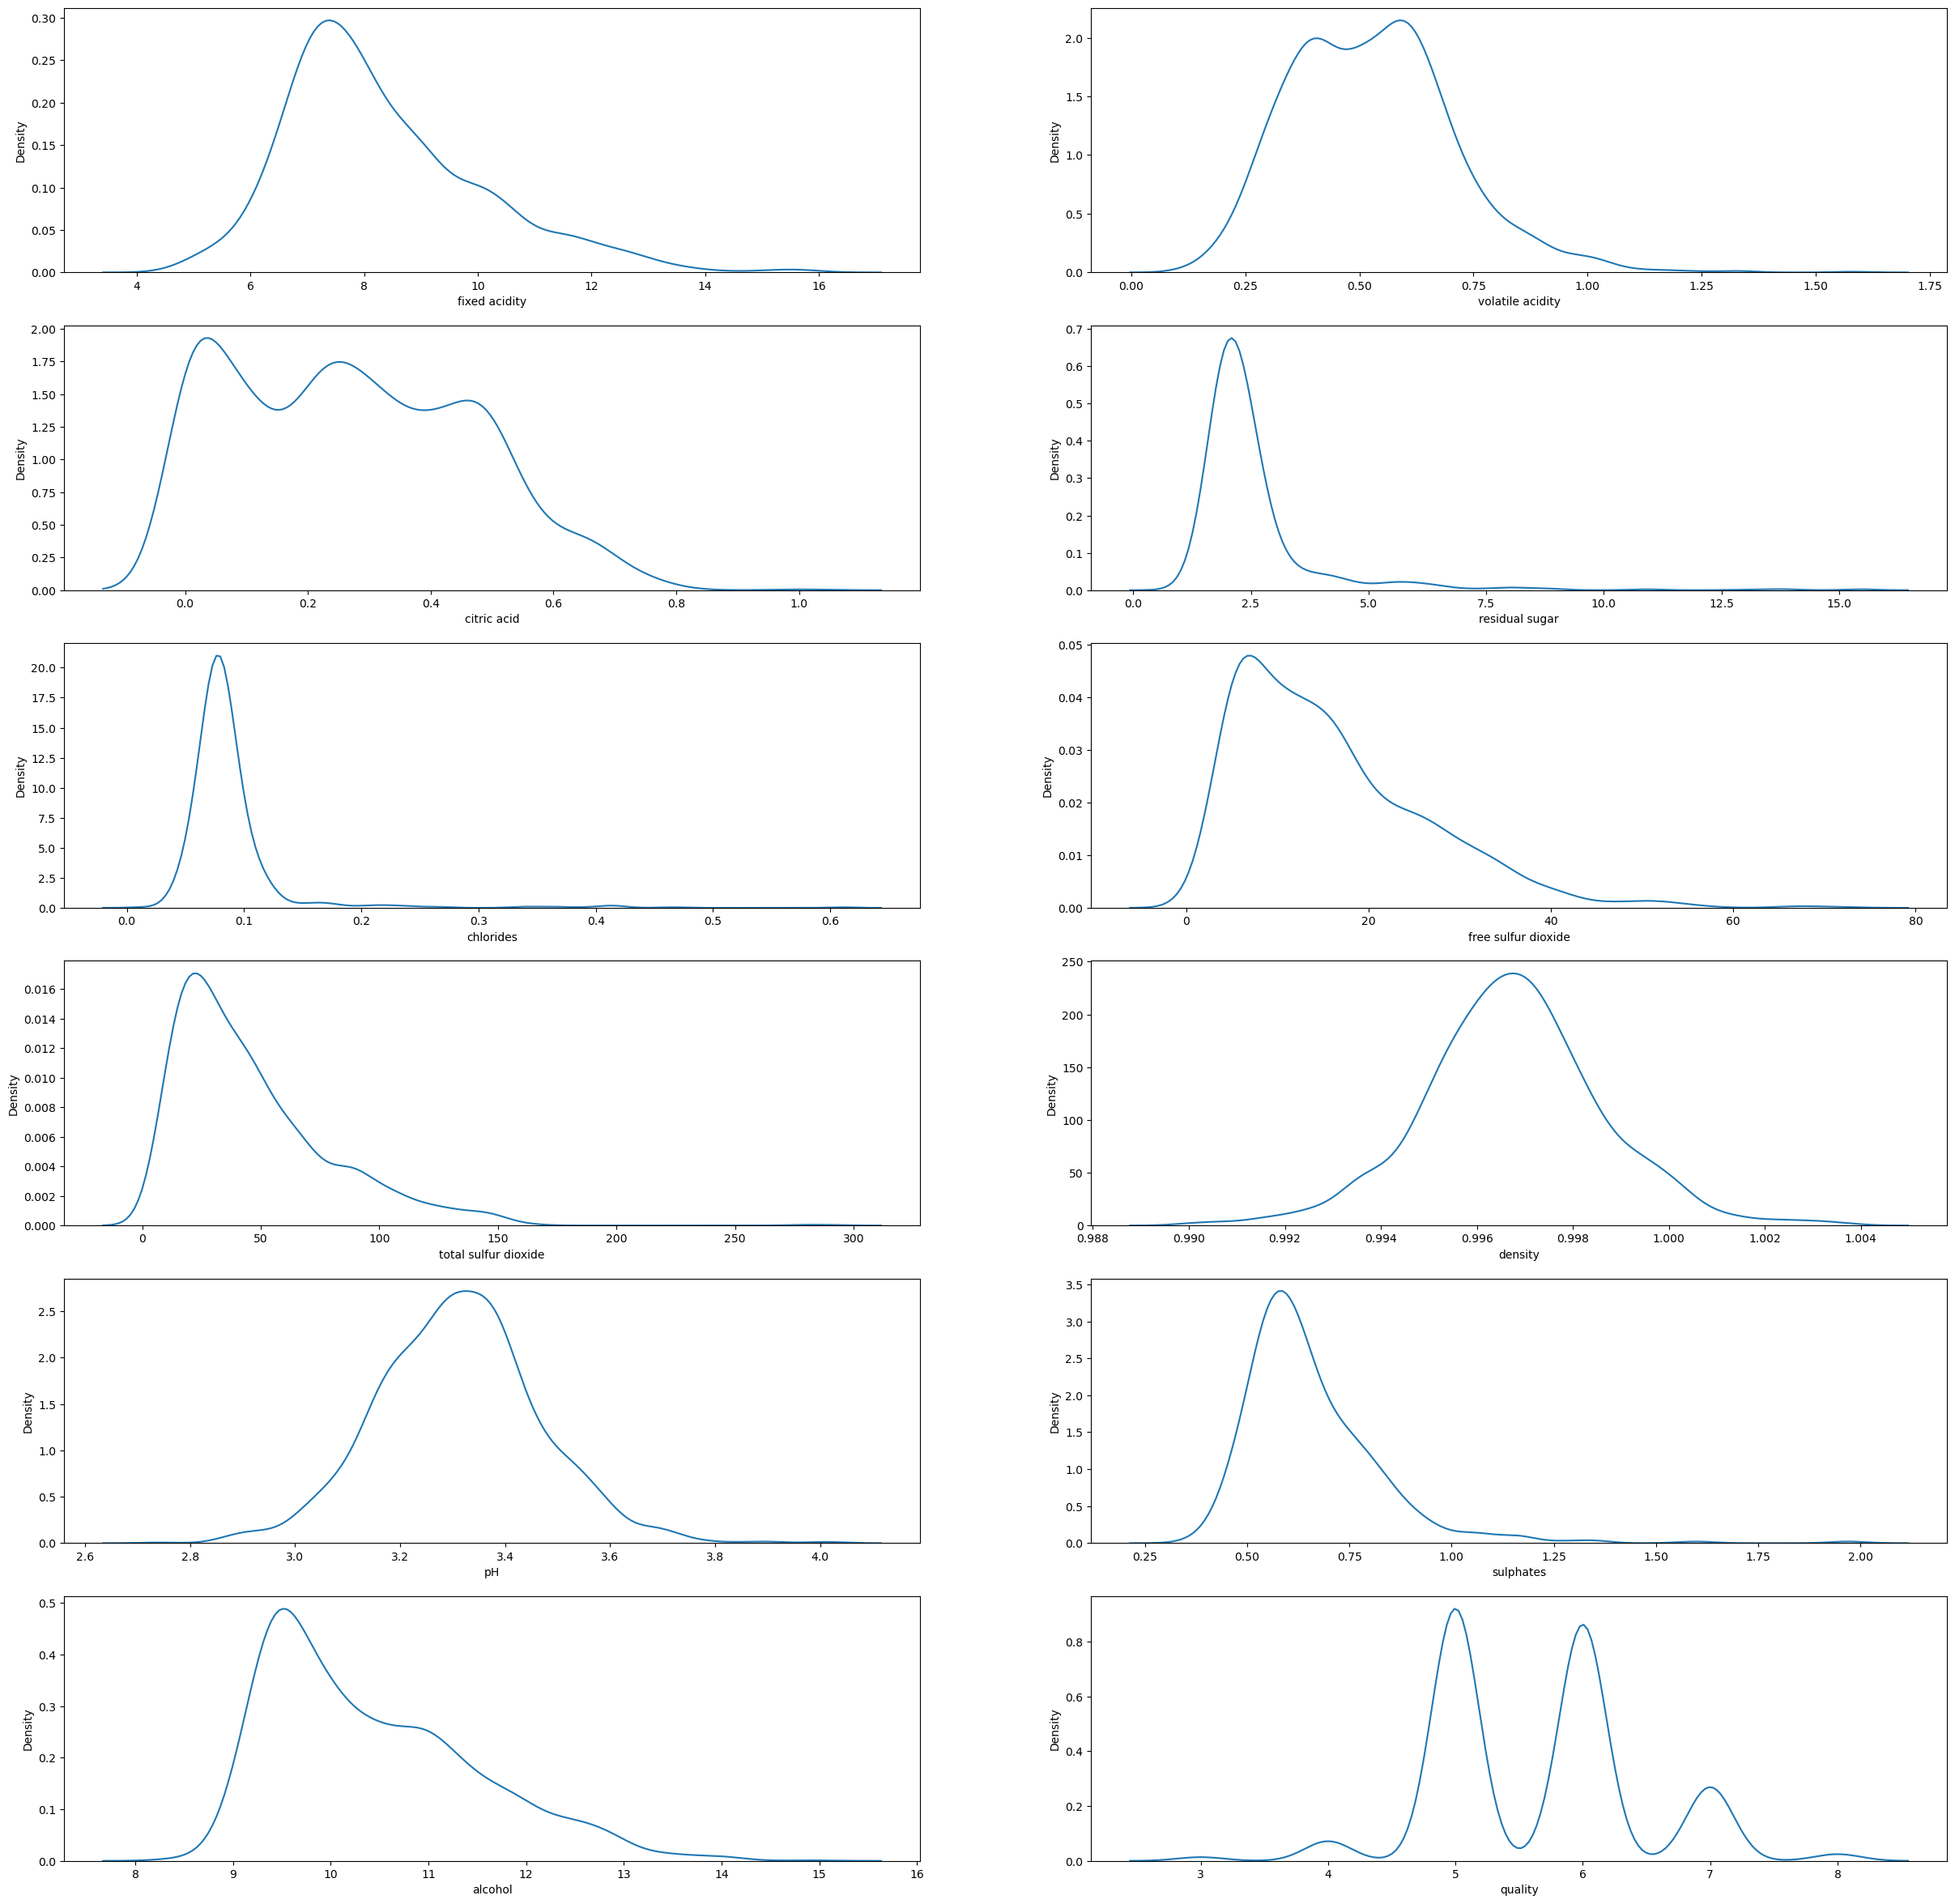

In [20]:
#Creating a distribution plot for each column in the dataframe
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax = ax)
        plt.xlabel(col)
        
plt.show()

# Scaling distribution

In [21]:
#using scaler
sc = sc()
scaled_df = sc.fit_transform(df)

In [89]:
scaled_df

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

# Cluster Amount Testing

/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

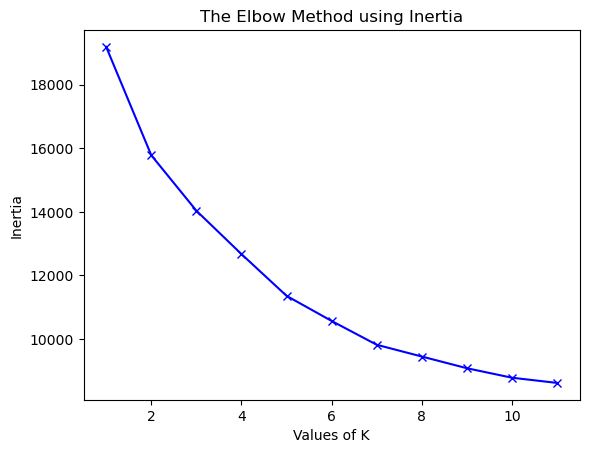

In [23]:
#elbow method 
inertia = []
range_val = range(1,12)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [24]:
#Silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    kmean = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmean.fit_predict(df)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)

/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average   silhoutte_score is : 0.6027870469574543
For n_clusters = 3 The average   silhoutte_score is : 0.520040798237555


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average   silhoutte_score is : 0.48375934291440664
For n_clusters = 5 The average   silhoutte_score is : 0.44499256111914126


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average   silhoutte_score is : 0.4462630538654589


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average   silhoutte_score is : 0.39887729397470745
For n_clusters = 8 The average   silhoutte_score is : 0.3757409390833858


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average   silhoutte_score is : 0.3812581137964671


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average   silhoutte_score is : 0.38015401438542357


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average   silhoutte_score is : 0.3802162564993676


/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average   silhoutte_score is : 0.3573808650668267


# Principal Component Analysis

In [25]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
...,...,...
1594,-2.241991,0.599594
1595,-2.122456,-0.370101
1596,-1.366265,-0.517561
1597,-2.367147,0.703545


# KMEANS 

In [26]:
#Choosing a Kmeans value of 2
kmeans_model=KMeans(2)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

/Users/chisomokezie/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


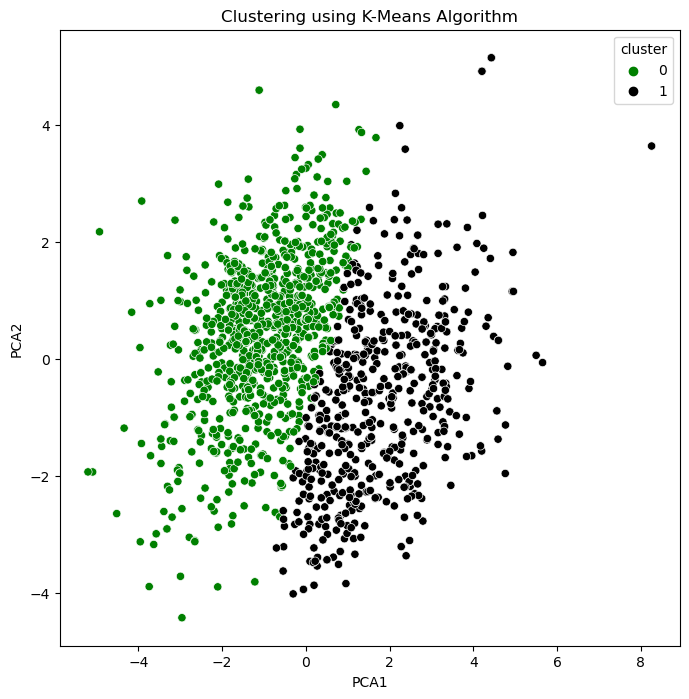

In [27]:
#Creating 2 clusters
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1", y="PCA2", hue="cluster",data=pca_df_kmeans,palette=['green','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

# Correlation(Feature Analysis)

/var/folders/m5/q1mm1gk177l92qfw78n6pkh40000gn/T/ipykernel_5668/867464335.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



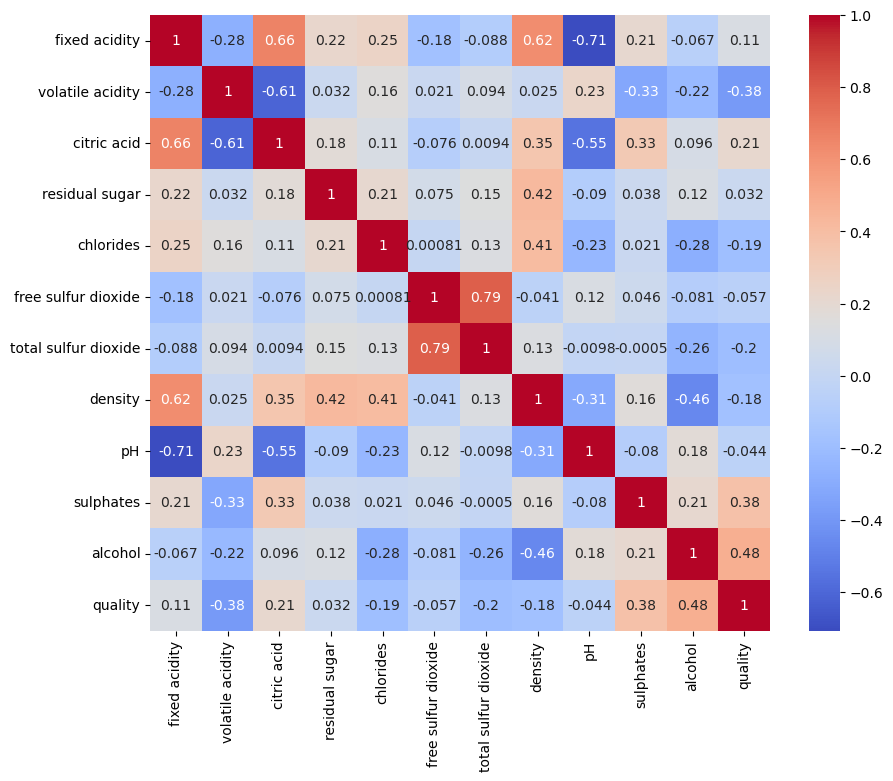

In [91]:
#creating correlation we choose spearman because we don't have a gausian distribution
corrdf_matrix = df.corr(method = 'spearman')

plt.figure(figsize=(10, 8))

# Create the heatmap using the `heatmap` function of Seaborn to see if theres a correlation between quality and acididty
sns.heatmap(corrdf_matrix, cmap='coolwarm', annot=True)

plt.show()

# Spearman Rank Correlation Test

In [30]:
#Spearman Rank Correlation Test
from scipy import stats
correlation_coefficient, p_value = stats.spearmanr(df['volatile acidity'], df['quality'])
print('p_value=%.3f' % (p_value))
if p_value > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print(p_value)

p_value=0.000
Probably dependent
2.7349440224655985e-56


In [31]:
#Spearman Rank Correlation Test, the p-value is 6.15 so it is true
from scipy import stats
correlation_coefficient, p_value = stats.spearmanr(df['citric acid'], df['quality'])
print('p_value=%.3f' % (p_value))
if p_value > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

print(p_value)

p_value=0.000
Probably dependent
6.158952285215761e-18


# ANOVA

In [32]:
#Dividing feature into three groups based on thirds =  low, mid and high values
df['volatile_acidity_groups'] = pd.cut(df['volatile acidity'], bins=3, labels=['Group 1', 'Group 2', 'Group 3'])

In [33]:
#Dividing feature into three groups based on thirds =  low, mid and high values
df['citric_acidity_groups'] = pd.cut(df['citric acid'], bins=3, labels=['Group 1', 'Group 2', 'Group 3'])

In [34]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile_acidity_groups,citric_acidity_groups
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Group 2,Group 1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Group 2,Group 1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Group 2,Group 1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Group 1,Group 2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Group 2,Group 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Group 1,Group 1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Group 1,Group 1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Group 1,Group 1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Group 2,Group 1


In [35]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

#categorized data into groups
grouped_citric_acidity = df['citric_acidity_groups']
grouped_volatile_acidity = df['volatile_acidity_groups']

# Create label encoders
label_encoder = LabelEncoder()

# Encode the categorical group labels
grouped_citric_acidity_encoded = label_encoder.fit_transform(grouped_citric_acidity)
grouped_volatile_acidity_encoded = label_encoder.fit_transform(grouped_volatile_acidity)

# Perform ANOVA tests
f_stat_citric, p_value_citric = stats.f_oneway(grouped_citric_acidity_encoded, df['quality'])
f_stat_volatile, p_value_volatile = stats.f_oneway(grouped_volatile_acidity_encoded, df['quality'])

print("ANOVA for 'citric acidity':")
print(f"F-statistic: {f_stat_citric}")
print(f"P-value: {p_value_citric}")

print("\nANOVA for 'volatile acidity':")
print(f"F-statistic: {f_stat_volatile}")
print(f"P-value: {p_value_volatile}")

ANOVA for 'citric acidity':
F-statistic: 47088.95843663146
P-value: 0.0

ANOVA for 'volatile acidity':
F-statistic: 51422.551905452165
P-value: 0.0


# Tukeyhsd Test - Visualization of what features allow the highest quality

Segmented feature(s) into group(s) of three(Group1, Group2, Group3) and visualizing where each group(s)(Group1, Group2, Group3) fall in relation to quality.

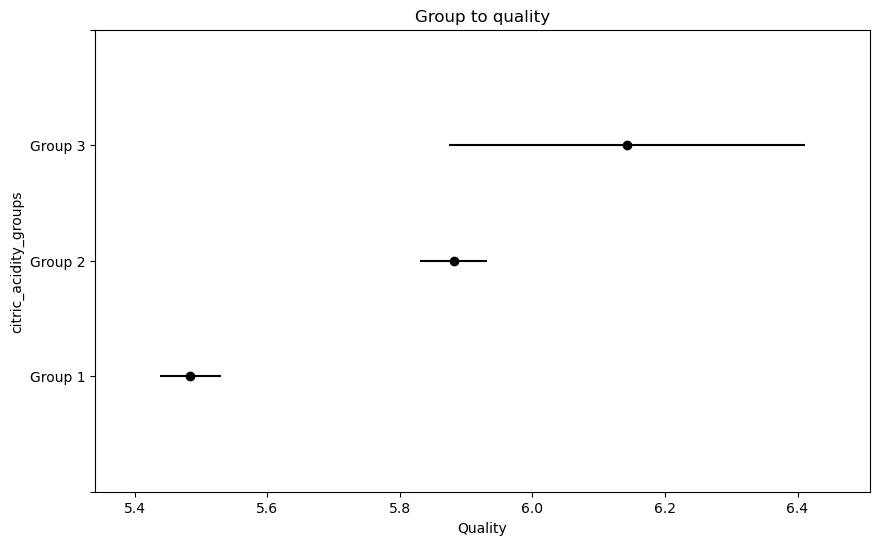

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['quality'], groups=df['citric_acidity_groups'], alpha=0.05)

# Plot the results
tukey.plot_simultaneous()

plt.title("Group to quality")
plt.xlabel("Quality")
plt.ylabel("citric_acidity_groups")

plt.show()
#shows that alochol with the higher citric acidity scores has better quality 

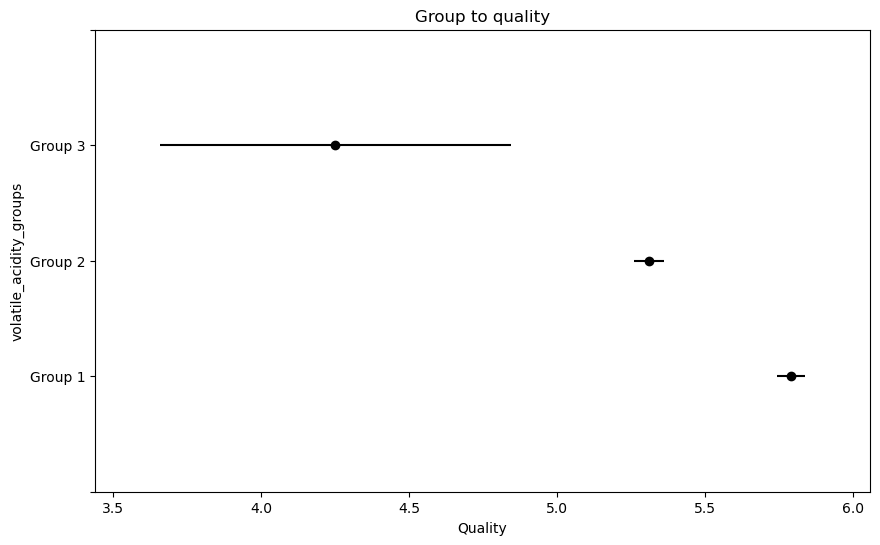

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['quality'], groups=df['volatile_acidity_groups'], alpha=0.05)

# Plot the results
tukey.plot_simultaneous()

plt.title("Group to quality")
plt.xlabel("Quality")
plt.ylabel("volatile_acidity_groups")

plt.show()
#Here it shows that wine with lower scores of Volatile Aciditiy has higher quality

The p-values you've obtained are extremely small, indicating highly significant Spearman rank correlations between the variables. Specifically:

For the relationship between "citric acidity" and "quality," the p-value is approximately 2.73e-56. This is an extremely small p-value, indicating a highly significant, strong, and negative Spearman rank correlation between "citric acidity" and "quality."
For the relationship between "volatile acidity" and "quality," the p-value is approximately 6.16e-18. This is also an extremely small p-value, indicating a highly significant, albeit less strong, Spearman rank correlation between "volatile acidity" and "quality."
Given these results, it is reasonable to conclude that both "citric acidity" and "volatile acidity" have statistically significant relationships with the "quality" of the wine. The negative correlation for "citric acidity" suggests that as "citric acidity" increases, wine quality tends to decrease, while the correlation for "volatile acidity" indicates a similar but weaker effect.

# Further Testing - Just contine with the above plot to show where values are and then create a barchart or countplot to view the data relative to the groups

# Cluster Analysis so we can view what features are consistent in a high quality wine

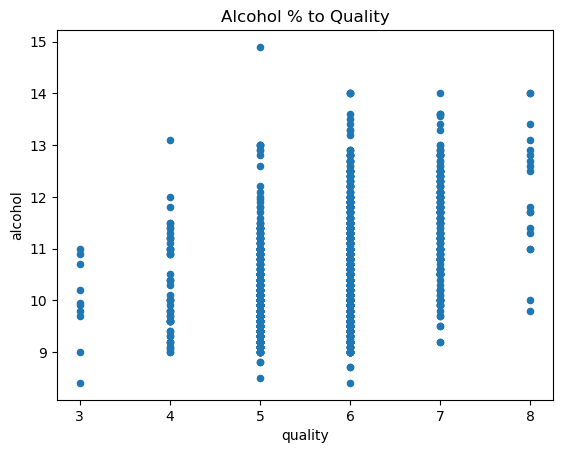

In [145]:
#Cluster analysis. based on the correlation to visualize the relationship between quality and alcohol content
df.plot(x='quality',y='alcohol', kind='scatter', title= 'Alcohol % to Quality')
plt.show()

In [144]:
#/* visualize data in multiple dimensions */
import plotly.graph_objects as go
import plotly.offline as pyo


columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']


fig = go.Figure(
    data=[
        go.Scatterpolar(r=df['fixed acidity'], theta=columns, fill='toself', name = 'Feature 1'),
        go.Scatterpolar(r=df['volatile acidity'], theta=columns, fill='toself', name = 'Feature 2'),
        go.Scatterpolar(r=df['citric acid'], theta=columns, fill='toself', name = 'Feature 3'),
        go.Scatterpolar(r=df['residual sugar'], theta=columns, fill='toself', name = 'Feature 4'),
        go.Scatterpolar(r=df['chlorides'], theta=columns, fill='toself', name = 'Feature 5'),
        go.Scatterpolar(r=df['free sulfur dioxide'], theta=columns, fill='toself', name = 'Feature 6'),
        go.Scatterpolar(r=df['total sulfur dioxide'], theta=columns, fill='toself', name = 'Feature 7'),
        go.Scatterpolar(r=df['density'], theta=columns, fill='toself', name = 'Feature 8'),
        go.Scatterpolar(r=df['pH'], theta=columns, fill='toself', name = 'Feature 9'),
        go.Scatterpolar(r=df['sulphates'], theta=columns, fill='toself', name = 'Feature 10'),
        go.Scatterpolar(r=df['alcohol'], theta=columns, fill='toself', name = 'Feature 11'),
        go.Scatterpolar(r=df['quality'], theta=columns, fill='toself', name = 'Feature 12')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature Analysis Highly Engaged'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)
fig.show()

#The output shows, provides a visualiziation of what the output of a decision tree might be, visualize the weight of each feature
#Feature 6 is highly engaged
#Feature 10 is modertly engaged
#Feature 11 has low engagement - Feature (Data) oriented cluster definiton to understand the meaning of the cluster

# Decision Tree

In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'volatile_acidity_groups',
       'citric_acidity_groups', 'residual_sugar_groups',
       'fixed_acidity_groups', 'chlorides_groups', 'free_sulfur_dioxide_group',
       'total_sulfur_dioxide_groups', 'density_group', 'pH_group',
       'sulphates_group', 'alcohol_group'],
      dtype='object')

In [99]:
df.drop(columns=['volatile_acidity_groups',
       'citric_acidity_groups', 'residual_sugar_groups',
       'fixed_acidity_groups', 'chlorides_groups', 'free_sulfur_dioxide_group',
       'total_sulfur_dioxide_groups', 'density_group', 'pH_group',
       'sulphates_group', 'alcohol_group'], axis=1, inplace = True)

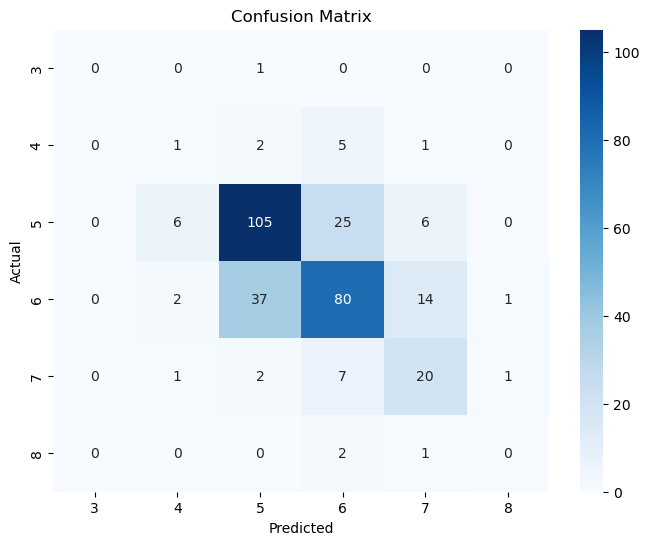

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.10      0.11      0.11         9
           5       0.71      0.74      0.73       142
           6       0.67      0.60      0.63       134
           7       0.48      0.65      0.55        31
           8       0.00      0.00      0.00         3

    accuracy                           0.64       320
   macro avg       0.49      0.35      0.34       320
weighted avg       0.65      0.64      0.64       320



In [121]:
# Importing necessary libraries for decision tree and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Split into X and y
X = df.drop(columns ='quality', axis=1)
y = df['quality']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=24)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))


# Save the model

In [110]:
#Creating a Decision_Tree
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

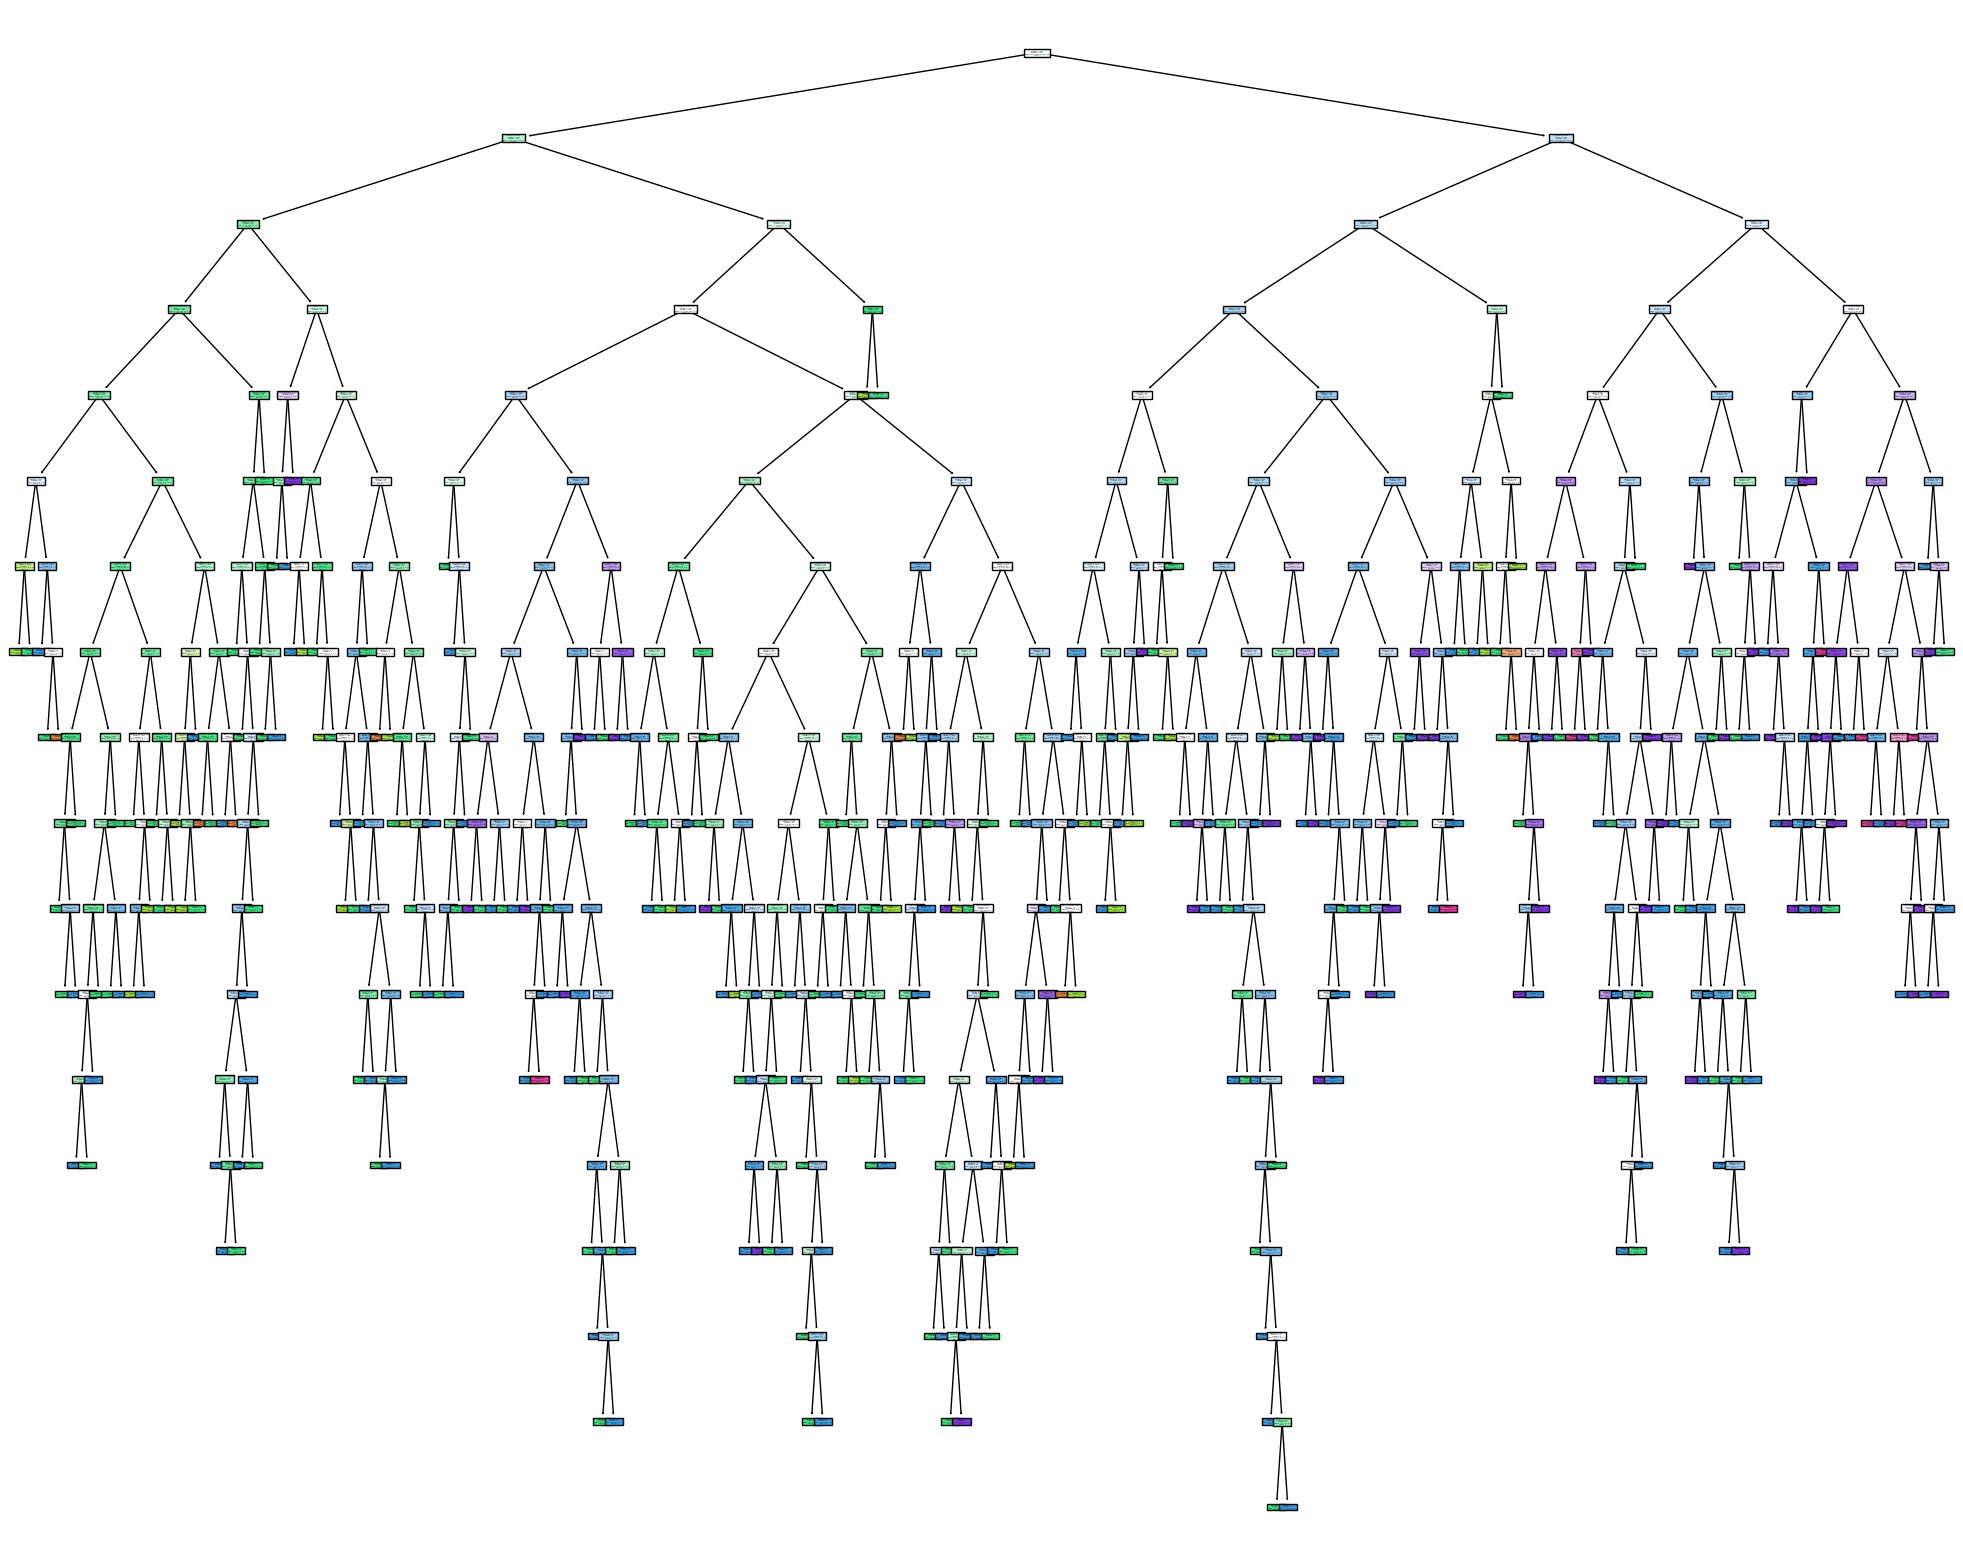

In [131]:
from sklearn.tree import plot_tree
# Visualize the decision tree
df['quality'] = df['quality'].astype(str)
fig = plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=X.columns, class_names=df['quality'].unique(), filled=True)
plt.show()

In [132]:
text = tree.export_text(model)
print(text)

|--- feature_10 <= 10.53
|   |--- feature_9 <= 0.57
|   |   |--- feature_10 <= 9.95
|   |   |   |--- feature_6 <= 63.50
|   |   |   |   |--- feature_10 <= 9.08
|   |   |   |   |   |--- feature_0 <= 7.80
|   |   |   |   |   |   |--- feature_9 <= 0.51
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_9 >  0.51
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_0 >  7.80
|   |   |   |   |   |   |--- feature_2 <= 0.55
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_2 >  0.55
|   |   |   |   |   |   |   |--- feature_8 <= 3.15
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_8 >  3.15
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_10 >  9.08
|   |   |   |   |   |--- feature_1 <= 0.73
|   |   |   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |   |   |--- feature_0 <= 7.65
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   | 

In [133]:
fig.savefig("decistion_tree.png")

In [111]:
import pickle 
filename = 'dt_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [134]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Accuracy')

0.91875 % Accuracy
